In [45]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from prep_plays import explore_plays_data, prep_plays_data
from wrangle_plays_data import train_validate_test, min_max_scale

In [92]:
train, validate, test = explore_plays_data()

# Does the offense formation matter? i.e. (is a certain offensive formation harder to defend?)

In [93]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
alpha = .05

- $H_0$: There is no dependence between offensive formation and pass stopped
- $H_a$: There is a dependence between offensive formation and pass stopped

In [94]:
observed = pd.crosstab(train.offenseFormation, train.pass_stopped)

In [95]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [96]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
p

We fail to reject the null hypothesis


0.32619531182951006

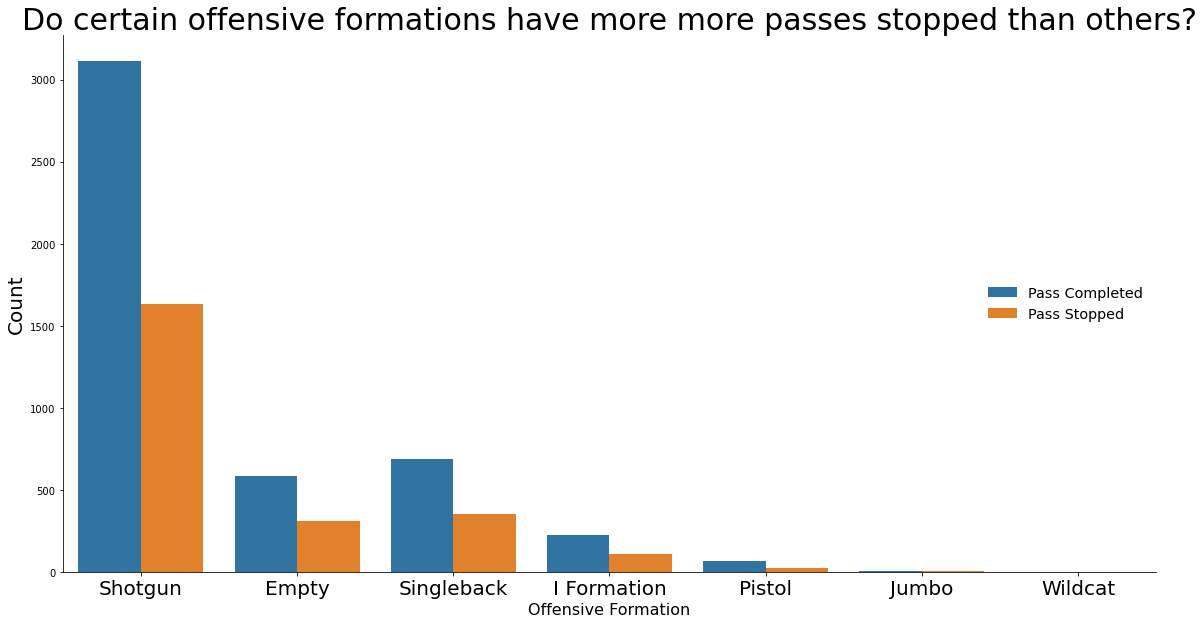

In [97]:
sns.catplot(x="offenseFormation", hue="pass_stopped", kind="count", data=train, height=8, aspect=2)._legend.remove()
plt.title('Do certain offensive formations have more more passes stopped than others?', size = 30)
plt.xlabel('Offensive Formation', size = 16)
plt.ylabel('Count', size = 20)
plt.legend(labels = ('Pass Completed', 'Pass Stopped'), loc='center right', frameon=False, fontsize='x-large')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Shotgun', 'Empty', 'Singleback', 'I Formation', 'Pistol', 'Jumbo', 'Wildcat'], size = 20)
plt.show()

**Takeaways:**
- There does not seem to be a certain formation that will have there pass stopped more than others
- After a statistical test, we can safely say that there is not dependence on stopping the play and the formation the offense is lined up in.

In [110]:
train.groupby('offenseFormation').pass_stopped.count()

offenseFormation
EMPTY          892
I_FORM         336
JUMBO            7
PISTOL          86
SHOTGUN       4745
SINGLEBACK    1041
WILDCAT          1
Name: pass_stopped, dtype: int64

In [111]:
train['offenseFormation'].

AttributeError: 'Series' object has no attribute 'pass_stopped'

# What defense schemes work to prevent a successful pass?

In [ ]:
train.T

In [ ]:
  #setting conditions for conference
    conditions = [
        #west teams
        (nba.Team.isin(['LAL', 'LAC', 'DEN', 'HOU', 'OKC', 'UTA', 'DAL', 'POR', 'MEM', 'PHO', 'SAS', 'SAC', 'NOP', 'MIN', 'GSW'])),
        #east teams
        (nba.Team.isin(['MIL', 'TOR', 'BOS', 'IND', 'MIA', 'PHI', 'BRK', 'ORL', 'WAS', 'CHO', 'CHI', 'NYK', 'DET', 'ATL', 'CLE']))]
    choices = ['home_is_west', 'home_is_east']
    #creating conference column for home team
    nba['Conference'] = np.select(conditions, choices, default='west')

In [ ]:
train.personnelD.value_counts()

In [ ]:
conditions = [
    (np.where((df['DL'] == 4) & (df['LB'] == 3),1,0)), 
    (np.where((df['DL'] == 3) & (df['LB'] == 4),1,0)),
    (np.where(df['DB'] == 5, 1, 0)),
    (np.where(df['DB'] == 6, 1, 0))]
choices =  ['four_three', 'three_four', 'nickel', 'dime']
df['defenseFormation'] = np.select(conditions, choices)

# Grid Search CV

## Gradient Boost

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [8]:
df = prep_plays_data()

In [9]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,16997,16998,16999,17000,17001,17002,17003,17004,17005,17006
playDescription,(15:00) M.Ryan pass short right to J.Jones pus...,(13:10) M.Ryan pass incomplete short right to ...,(13:05) (Shotgun) M.Ryan pass incomplete short...,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,(10:59) (Shotgun) M.Ryan pass incomplete short...,(10:10) (Shotgun) N.Foles pass short left to N...,(9:24) (Shotgun) N.Foles pass incomplete short...,(9:08) M.Ryan pass incomplete deep left to M.S...,(7:01) M.Ryan pass short left to T.Coleman pus...,(6:19) M.Ryan pass short left to A.Hooper to P...,...,(7:39) (Shotgun) P.Rivers pass incomplete shor...,(7:35) (Shotgun) P.Rivers pass short right to ...,(6:51) P.Rivers pass short right to J.Jackson ...,(2:54) (Shotgun) P.Rivers pass short left to A...,(2:40) (Shotgun) P.Rivers pass short left to K...,(2:19) (Shotgun) P.Rivers pass short right to ...,(2:00) (Shotgun) P.Rivers pass short left to K...,(1:41) (Shotgun) P.Rivers pass incomplete shor...,(1:37) (Shotgun) P.Rivers pass incomplete deep...,(1:31) (Shotgun) P.Rivers pass deep middle int...
quarter,1,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4
down,1,1,2,3,3,2,3,1,2,1,...,2,3,1,1,1,2,1,1,2,3
yardsToGo,15,10,10,10,1,8,4,10,13,10,...,6,6,10,20,10,2,10,10,10,10
team_by_comp_yds,3,3,3,3,3,8,8,3,3,3,...,19,19,19,19,19,19,19,19,19,19
defendersInTheBox,7,7,6,6,8,7,6,7,8,8,...,6,6,6,6,6,6,4,5,4,6
numberOfPassRushers,4,4,4,5,6,4,4,4,4,3,...,6,5,4,5,5,4,5,5,4,4
QB_under_pressure,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gameClock,15:00:00,13:10:00,13:05:00,13:01:00,10:59:00,10:10:00,09:24:00,09:08:00,07:01:00,06:19:00,...,07:39:00,07:35:00,06:51:00,02:54:00,02:40:00,02:19:00,02:00:00,01:41:00,01:37:00,01:31:00
absoluteYardlineNumber,90,49,49,49,11,14,18,54,46,20,...,51,51,44,59,85,77,70,53,53,53


In [10]:
X_train, y_train, X_validate, y_validate, X_test, y_test = train_validate_test(df)

In [11]:
X_train_scaled, X_validate_scaled, X_test_scaled = min_max_scale(X_train, X_validate, X_test)

In [12]:
X_train_scaled.T

,4170,14076,15897,2723,632,15975,11753,5365,6662,4350,...,2766,5241,184,4947,2719,2507,10063,10013,3002,13187
quarter,0.250000,0.750000,0.500000,0.500000,0.750000,0.000000,0.250000,0.250000,0.750000,0.250000,...,0.000000,0.750000,0.250000,0.000000,0.250000,0.250000,0.250000,0.500000,0.750000,0.250000
down,0.333333,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.333333,0.666667,0.000000,...,0.000000,0.333333,0.666667,0.333333,0.000000,0.000000,0.333333,0.666667,0.333333,0.333333
yardsToGo,0.103448,0.310345,0.068966,0.310345,0.275862,0.275862,0.310345,0.310345,1.000000,0.310345,...,0.310345,0.241379,0.068966,0.241379,0.310345,0.310345,0.068966,0.241379,0.068966,0.241379
team_by_comp_yds,0.032258,0.354839,0.709677,0.483871,1.000000,0.612903,0.193548,0.838710,0.806452,0.258065,...,0.419355,0.225806,0.161290,0.741935,0.870968,0.096774,0.935484,0.516129,0.935484,0.000000
defendersInTheBox,0.500000,0.500000,0.750000,0.625000,0.500000,0.625000,0.500000,0.500000,0.250000,0.500000,...,0.500000,0.625000,0.625000,0.500000,0.625000,0.625000,0.375000,0.500000,0.625000,0.375000
numberOfPassRushers,0.500000,0.625000,0.875000,0.500000,0.500000,0.625000,0.500000,0.500000,0.375000,0.500000,...,0.625000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
QB_under_pressure,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
absoluteYardlineNumber,0.357143,0.551020,0.938776,0.326531,0.918367,0.346939,0.244898,0.459184,0.387755,0.673469,...,0.244898,0.734694,0.622449,0.112245,0.255102,0.500000,0.744898,0.897959,0.153061,0.755102
epa,0.520279,0.551760,0.650855,0.552154,0.549888,0.519158,0.525478,0.527526,0.567538,0.545264,...,0.535672,0.554137,0.644041,0.640639,0.543087,0.690090,0.585577,0.687523,0.594821,0.508186
DL,0.333333,0.500000,0.666667,0.666667,0.333333,0.333333,0.666667,0.666667,0.500000,0.666667,...,0.666667,0.666667,0.666667,0.666667,0.666667,0.666667,0.333333,0.333333,0.666667,0.666667


In [13]:
boost_params = {'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

In [14]:
ml = GridSearchCV(GradientBoostingClassifier(), boost_params, cv=5)
ml.fit(X_train_scaled, y_train)
print(ml.score(X_train_scaled, y_train))

0.8950980392156863


In [15]:
y_pred = ml.predict(X_train_scaled)

In [16]:
cm = pd.DataFrame(confusion_matrix(y_train, y_pred))
cm

,0,1
0,4042,564
1,185,2349


In [17]:
class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))
class_report

,0,1,accuracy,macro avg,weighted avg
precision,0.956234,0.806385,0.895098,0.881309,0.903052
recall,0.877551,0.926993,0.895098,0.902272,0.895098
f1-score,0.915204,0.862493,0.895098,0.888849,0.896497
support,4606.000000,2534.000000,0.895098,7140.000000,7140.000000


In [18]:
### Gradient Boost

print(ml.score(X_validate_scaled, y_validate))

0.8861344537815126


In [19]:
y_pred_val = ml.predict(X_validate_scaled)

In [20]:
cm = pd.DataFrame(confusion_matrix(y_pred_val, y_validate))
cm

,0,1
0,2762,141
1,401,1456


In [33]:
class_report = pd.DataFrame(classification_report(y_validate, y_pred_val, output_dict=True))
class_report

,0,1,accuracy,macro avg,weighted avg
precision,0.951430,0.784060,0.886134,0.867745,0.895276
recall,0.873222,0.911709,0.886134,0.892466,0.886134
f1-score,0.910650,0.843080,0.886134,0.876865,0.887980
support,3163.000000,1597.000000,0.886134,4760.000000,4760.000000


## Select Percentile

In [35]:
from sklearn.feature_selection import SelectPercentile

In [40]:
select = SelectPercentile(percentile=30) 
select.fit(X_train_scaled, y_train)

SelectPercentile(percentile=30)

In [41]:
X_train_selected = select.transform(X_train_scaled)

In [42]:
print("X_train.shape: {}".format(X_train_scaled.shape)) 
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (7140, 16)
X_train_selected.shape: (7140, 5)


[False  True False False False  True  True False  True False False  True
 False False False False]


Text(0.5, 0, 'Sample index')

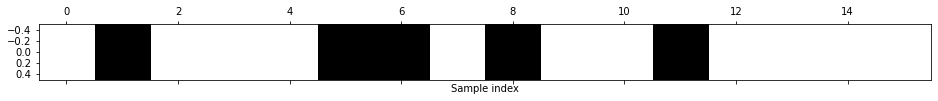

In [46]:
mask = select.get_support()
print(mask)
# visualize the mask -- black is True, white is False 
plt.matshow(mask.reshape(1, -1), cmap='gray_r') 
plt.xlabel("Sample index")

In [48]:
X_train_select5 = X_train_scaled[['down', 'numberOfPassRushers', 'QB_under_pressure', 'epa', 'DB']]

In [49]:
ml = GridSearchCV(GradientBoostingClassifier(), boost_params, cv=5)
ml.fit(X_train_select5, y_train)
print(ml.score(X_train_select5, y_train))

0.8677871148459384


In [51]:
y_pred_select = ml.predict(X_train_select5)

In [52]:
cm = pd.DataFrame(confusion_matrix(y_train, y_pred_select))
cm

,0,1
0,3904,702
1,242,2292


## Select From Model

In [34]:
from sklearn.feature_selection import SelectFromModel

X_train.shape: (7140, 16)
X_train_l1.shape: (7140, 8)


Text(0.5, 0, 'Sample index')

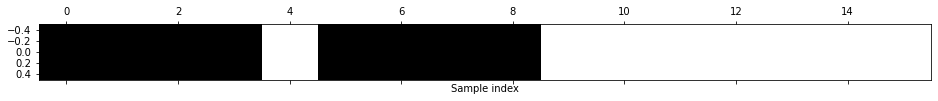

In [69]:
select = SelectFromModel(
        GradientBoostingClassifier(),
        threshold="median")

select.fit(X_train_scaled, y_train)
X_train_l1 = select.transform(X_train_scaled) 
print("X_train.shape: {}".format(X_train_scaled.shape)) 
print("X_train_l1.shape: {}".format(X_train_l1.shape))

mask = select.get_support()
# visualize the mask -- black is True, white is False 
plt.matshow(mask.reshape(1, -1), cmap='gray_r') 
plt.xlabel("Sample index")

In [58]:
X_train_scaled

,quarter,down,yardsToGo,team_by_comp_yds,defendersInTheBox,numberOfPassRushers,QB_under_pressure,absoluteYardlineNumber,epa,DL,LB,DB,four_three,three_four,nickel,dime
4170,0.25,0.333333,0.103448,0.032258,0.500,0.500,0.0,0.357143,0.520279,0.333333,0.666667,0.571429,0.0,0.0,1.0,0.0
14076,0.75,0.000000,0.310345,0.354839,0.500,0.625,0.0,0.551020,0.551760,0.500000,0.666667,0.428571,0.0,1.0,0.0,0.0
15897,0.50,0.333333,0.068966,0.709677,0.750,0.875,0.0,0.938776,0.650855,0.666667,0.333333,0.571429,0.0,0.0,1.0,0.0
2723,0.50,0.000000,0.310345,0.483871,0.625,0.500,0.0,0.326531,0.552154,0.666667,0.500000,0.428571,1.0,0.0,0.0,0.0
632,0.75,0.000000,0.275862,1.000000,0.500,0.500,0.0,0.918367,0.549888,0.333333,0.666667,0.571429,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,0.25,0.000000,0.310345,0.096774,0.625,0.500,0.0,0.500000,0.690090,0.666667,0.333333,0.571429,0.0,0.0,1.0,0.0
10063,0.25,0.333333,0.068966,0.935484,0.375,0.500,0.0,0.744898,0.585577,0.333333,0.500000,0.714286,0.0,0.0,0.0,1.0
10013,0.50,0.666667,0.241379,0.516129,0.500,0.500,0.0,0.897959,0.687523,0.333333,0.500000,0.714286,0.0,0.0,0.0,1.0
3002,0.75,0.333333,0.068966,0.935484,0.625,0.500,0.0,0.153061,0.594821,0.666667,0.333333,0.571429,0.0,0.0,1.0,0.0


In [75]:
X_train_scaled_select8 = X_train_scaled[['quarter', 'down', 'yardsToGo', 'team_by_comp_yds', 'numberOfPassRushers', 'QB_under_pressure', 'absoluteYardlineNumber', 'epa']]

In [76]:
ml = GridSearchCV(GradientBoostingClassifier(), boost_params, cv=5)
ml.fit(X_train_scaled_select8, y_train)
print(ml.score(X_train_scaled_select8, y_train))

0.8941176470588236


In [77]:
y_pred = ml.predict(X_train_scaled_select8)

In [78]:
cm = pd.DataFrame(confusion_matrix(y_train, y_pred))
cm

,0,1
0,4050,556
1,200,2334


In [79]:
class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))
class_report

,0,1,accuracy,macro avg,weighted avg
precision,0.952941,0.807612,0.894118,0.880277,0.901364
recall,0.879288,0.921073,0.894118,0.900181,0.894118
f1-score,0.914634,0.860619,0.894118,0.887627,0.895464
support,4606.000000,2534.000000,0.894118,7140.000000,7140.000000


In [82]:
X_validate_scaled_select8 = X_validate_scaled[['quarter', 'down', 'yardsToGo', 'team_by_comp_yds', 'numberOfPassRushers', 'QB_under_pressure', 'absoluteYardlineNumber', 'epa']]

In [83]:
print(ml.score(X_validate_scaled_select8, y_validate))

0.8880252100840336


In [85]:
y_pred_val = ml.predict(X_validate_scaled_select8)

In [86]:
cm = pd.DataFrame(confusion_matrix(y_pred_val, y_validate))
cm

,0,1
0,2760,130
1,403,1467


In [87]:
class_report = pd.DataFrame(classification_report(y_validate, y_pred_val, output_dict=True))
class_report

,0,1,accuracy,macro avg,weighted avg
precision,0.955017,0.784492,0.888025,0.869755,0.897805
recall,0.872589,0.918597,0.888025,0.895593,0.888025
f1-score,0.911944,0.846265,0.888025,0.879105,0.889909
support,3163.000000,1597.000000,0.888025,4760.000000,4760.000000


In [73]:
X_test_scaled_select8 = X_test_scaled[['quarter', 'down', 'yardsToGo', 'team_by_comp_yds', 'numberOfPassRushers', 'QB_under_pressure', 'absoluteYardlineNumber', 'epa']]

In [74]:
print(ml.score(X_test_scaled_select8, y_test))

0.8886492844540286


In [68]:
feature_importances = pd.DataFrame(ml.feature_importances_,
                                   index = X_train_scaled.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

## Logistic coeff

In [21]:
from sklearn.linear_model import LogisticRegression

In [26]:
logit = LogisticRegression()
logit.fit(X_train_scaled, y_train)
    
#creating a list comprehension for the column names
names = [column for column in X_train_scaled.columns]
#adding intercept to the end of the list
names.append('intercept')
#creating a dataframe from the regression coefficient values and intercept
coeff = pd.DataFrame(np.append(logit.coef_, logit.intercept_)).T
#renaming the column names with the list of names
coeff.columns = names

In [32]:
coeff.T

,0
quarter,0.132999
down,-0.603954
yardsToGo,-1.753443
team_by_comp_yds,-0.027548
defendersInTheBox,0.687614
numberOfPassRushers,1.138113
QB_under_pressure,0.808107
absoluteYardlineNumber,-0.010481
epa,-22.559967
DL,-0.247300


In [ ]:
# ### Ridge Classifier

# clf = RidgeClassifierCV()
# clf.fit(X_train, y_train)
# print(clf.score(X_train, y_train))

# ### Random Forest

# tree = RandomForestClassifier()
# tree.fit(X_train, y_train)
# print(tree.score(X_train, y_train))

### Gradient Boost

In [ ]:
### Ridge Classifier

# print(clf.score(X_validate, y_validate))

# ### Random Forest

# print(tree.score(X_validate, y_validate))

# RFE selection

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
import matplotlib as plt

In [ ]:
estimators = [1,5,10,20,40]

In [ ]:
select = RFE(RandomForestClassifier(n_estimators=5, random_state=42),
                 n_features_to_select=5)

In [ ]:
select.fit(X_train, y_train)

In [ ]:
mask = select.get_support() 
plt.pyplot.matshow(mask.reshape(1, -1), cmap='gray_r') 

In [ ]:
X_train

# Train and Validate Functions

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import mglearn

In [ ]:
logreg = LogisticRegression()
scores = cross_val_score(logreg, X_train, y_train, cv = 5) 
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

## Overfitting Parameters

In [ ]:
from sklearn.svm import SVC

In [ ]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]: 
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
            # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the validate set
        score = svm.score(X_validate, y_validate)
        # if we got a better score, store the score and parameters 
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
print("Best score: {:.2f}".format(best_score)) 
print("Best parameters: {}".format(best_parameters))

In [ ]:
test_score = svm.score(X_test, y_test)
test_score

## Grid Search with Cross Validation

In [ ]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]: 
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
# for each combination of parameters, # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_train, y_train, cv=5) # compute mean cross-validation accuracy
        score = np.mean(scores)
        # if we got a better score, store the score and parameters 
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set 
svm = SVC(**best_parameters)
svm.fit(X_train, y_train)

In [ ]:
mglearn.plots.plot_cross_val_selection()

In [ ]:
# We are not using the validate stage to choose the test parameters

In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
import mglearn

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
# The best_score_ attribute stores the mean cross-validation accuracy, 
# with cross-validation performed on the training set.
# be careful not to confuse best_score_ with the generaliza‐ tion 
# performance of the model as computed by the score method on the test set.

In [ ]:
print("Validate set score: {:.2f}".format(grid_search.score(X_validate, y_validate)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

In [ ]:
results = pd.DataFrame(grid_search.cv_results_) # show the first 5 rows 
results.head()

In [ ]:
 scores = np.array(results.mean_test_score).reshape(6, 6)

In [ ]:
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                          ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

In [ ]:
fig, axes = plt.pyplot.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma':  np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma':  np.logspace(-7, -2, 6)}
for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)
plt.colorbar(scores_image, ax=axes.tolist())

## Nested Cross Validation

In [ ]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                             X_train, y_train, cv=5)
print("Cross-validation scores: ", scores) 
print("Mean cross-validation score: ", scores.mean())

In [ ]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid): 
    outer_scores = []
    # for each split of the data in the outer cross-validation
    # (split method returns indices)
    for training_samples, test_samples in outer_cv.split(X, y): 
        # find best parameter using inner cross-validation 
        best_parms = {}
        best_score = -np.inf
        # iterate over parameters
        for parameters in parameter_grid:
            # accumulate score over inner splits 
            cv_scores = []
            # iterate over inner cross-validation
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # build classifier given parameters and training data 
                clf = Classifier(**parameters) 
                clf.fit(X[inner_train], y[inner_train])
                # evaluate on inner test set
                score = clf.score(X[inner_test], y[inner_test]) 
                cv_scores.append(score)
            # compute mean score over inner folds
            mean_score = np.mean(cv_scores) 
            if mean_score > best_score:
                # if better than so far, remember parameters
                best_score = mean_score
                best_params = parameters
        # build classifier on best parameters using outer training set 
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # evaluate
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [ ]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold 
scores = nested_cv(X_train, y_train, StratifiedKFold(5),
            StratifiedKFold(5), SVC, ParameterGrid(param_grid)) 
print("Cross-validation scores: {}".format(scores))